In [1]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import thinkplot
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [2]:
import networksimulator as ns
import game_noise as gm
from importlib import reload

In [3]:
reload(gm)

<module 'game_noise' from '/Users/innovatio/code/Capstone/game_noise.py'>

## Basic simulation

Text(0.5, 1.0, '0.01, 0.005, -0.01, both noise and regression')

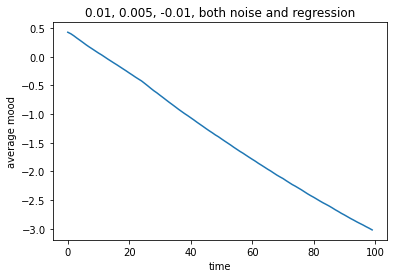

In [4]:
#make a graph
ws1 = ns.make_ws_graph(20, 5, 0.6)
#initialize a network of aganet and store in dictionary
ws_di1 = gm.initialize_network_agent(ws1)
#change payoff
gm.change_all_payoff(ws_di1,0.01,0.005,-0.01)

#change noise index
gm.change_mood_noise(ws_di1, 0.03)
gm.change_mood_regression(ws_di1, 0.005) #0.5%percentage of regression

#loop
mood_ovt = gm.run_sim(ws1,ws_di1,100,1,1) #default:  mvy - no mood noise, mry no mood regression

# plot
plt.plot( mood_ovt)
plt.xlabel("time")
plt.ylabel("average mood")
plt.title("0.01, 0.005, -0.01, both noise and regression")

Text(0.5, 1.0, '0.01, 0.005, -0.01, with random noise')

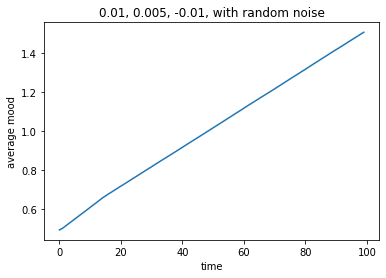

In [5]:
#make a graph
ws1 = ns.make_ws_graph(20, 5, 0.6)
#initialize a network of aganet and store in dictionary
ws_di1 = gm.initialize_network_agent(ws1)
#change payoff
gm.change_all_payoff(ws_di1,0.01,0.005,-0.01)

#change noise index
gm.change_mood_noise(ws_di1, 0.003)
gm.change_mood_regression(ws_di1, 0.03)

#loop
mood_ovt = gm.run_sim(ws1,ws_di1,100,1,0) #have noise but not regression to mean  mvy = 0, mry = 0

# plot
plt.plot( mood_ovt)
plt.xlabel("time")
plt.ylabel("average mood")
plt.title("0.01, 0.005, -0.01, with random noise")

Text(0.5, 1.0, '0.01, 0.005, -0.01, with mood regression')

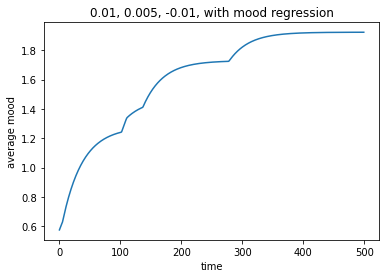

In [6]:
#make a graph
ws1 = ns.make_ws_graph(20, 5, 0.6)
#initialize a network of aganet and store in dictionary
ws_di1 = gm.initialize_network_agent(ws1)
#change payoff
gm.change_all_payoff(ws_di1,0.01,0.005,-0.01)

#change noise index
gm.change_mood_noise(ws_di1, 0.03)
gm.change_mood_regression(ws_di1, 0.03)

#loop
mood_ovt = gm.run_sim(ws1,ws_di1,500,0,1) #have regression to mean but no enviormental noise mvy = 0, mry = 0

# plot
plt.plot( mood_ovt)
plt.xlabel("time")
plt.ylabel("average mood")
plt.title("0.01, 0.005, -0.01, with mood regression")

# Divergence among agents
It's quite clear that adding noise allow the system to become much harder to predict. but still we can try to see if the agent diverge 

So far it seems that noise and mood regression should have less impact on agane mood than direct interaction

Given that, mood variability (change mood because of random enviormental factors will not result in clear divergence. Think about it on social level it makes sense -- mood always come from some form of interaction - either virtual interaction or interaction in physical space can be modeled by social network

Mood regression to mean will keep the divergence for highly connected networks (not sure of it's because these's more interacton that dilute the effect of mood regression, however, if we assume the mood regresion happens as a function of time this modeling assumption still holds)

For more connected network on the other hand, it seems that mood regression will make the mood varies more.
## Same pattern preserved with mood regression

13.858658761254711

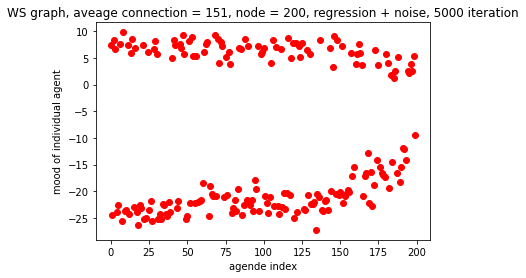

In [7]:
#make a graph
ws1 = ns.make_ws_graph(200, 151, 0.6)
#initialize a network of aganet and store in dictionary
ws_di1 = gm.initialize_network_agent(ws1)
#change payoff
gm.change_all_payoff(ws_di1,0.01,0.005,-0.01)

#change noise index
gm.change_mood_noise(ws_di1, 0.001) #vary (-0.5,  0.5) * 0,01
gm.change_mood_regression(ws_di1, 0.05) #5%regression

#loop
mood_ovt = gm.run_sim(ws1,ws_di1, 5000, 1, 1) #play(network, directory,  mvy = 0, mry = 0

#agent value
mood_value = []    
for i in list(ws_di1.values()):
        mood_value.append(i.mood)
        

#plot       
plt.plot(mood_value,'ro')  
plt.xlabel("agende index")
plt.ylabel("mood of individual agent")
plt.title("WS graph, aveage connection = 151, node = 200, regression + noise, 5000 iteration")
np.std(mood_value)

Text(0.5, 1.0, '0.01, 0.005, -0.01, noise +  mood regression')

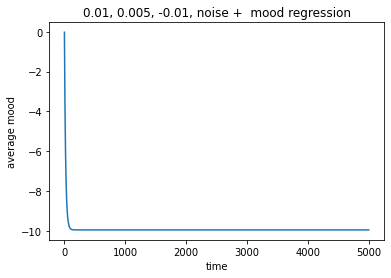

In [8]:
# plot average
plt.plot( mood_ovt)
plt.xlabel("time")
plt.ylabel("average mood")
plt.title("0.01, 0.005, -0.01, noise +  mood regression")

NetworkXException: G is not planar.

1.2154568915499864

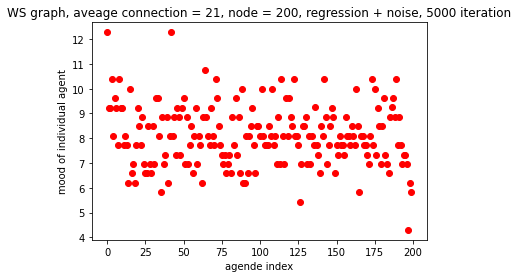

In [32]:
#make a graph
ws2 = ns.make_ws_graph(200, 21, 0.6)
#initialize a network of aganet and store in dictionary
ws_di2 = gm.initialize_network_agent(ws2)
#change payoff
gm.change_all_payoff(ws_di2,0.01,0.005,-0.01)

#change noise index
gm.change_mood_noise(ws_di2, 0.001) #vary (-0.5,  0.5) * 0,01
gm.change_mood_regression(ws_di2, 0.05) #5%regression
#loop 
mood_ovt = gm.run_sim(ws2,ws_di2, 5000, 1, 1) # play(network, directory, mvy = 0, mry = 0): 

#agent value
mood_value = []    
for i in list(ws_di2.values()):
        mood_value.append(i.mood)
        

#plot       
plt.plot(mood_value,'ro')  
plt.xlabel("agende index")
plt.ylabel("mood of individual agent")
plt.title("WS graph, aveage connection = 21, node = 200, regression + noise, 5000 iteration")
np.std(mood_value)

Text(0.5, 1.0, '0.01, 0.005, -0.01, with mood regression')

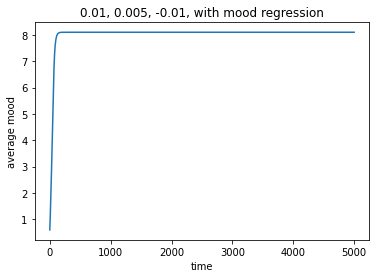

In [33]:
# plot average
plt.plot( mood_ovt)
plt.xlabel("time")
plt.ylabel("average mood")
plt.title("0.01, 0.005, -0.01, with mood regression")

## Mood noise

78.03506264099546

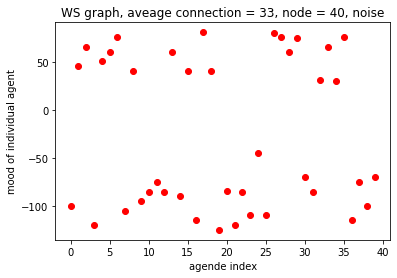

In [25]:
ws1 = ns.make_ws_graph(40, 33, 0.6)
#initialize a network of aganet and store in dictionary
ws_di1 = gm.initialize_network_agent(ws1)
#change payoff
gm.change_all_payoff(ws_di1,0.01,0.005,-0.01)

#change noise index
gm.change_mood_noise(ws_di1, 0.01) #vary (-0.5,  0.5) * 0,01
gm.change_mood_regression(ws_di1, 0.05) #5%regression

#loop
mood_ovt = gm.run_sim(ws1,ws_di1, 500, 1, 0) #play(network, directory,  mvy = 0, mry = 0

#agent value
mood_value = []    
for i in list(ws_di1.values()):
        mood_value.append(i.mood)
        

#plot       
plt.plot(mood_value,'ro')  
plt.xlabel("agende index")
plt.ylabel("mood of individual agent")
plt.title("WS graph, aveage connection = 33, node = 40, noise")
np.std(mood_value)

17.60177067158435

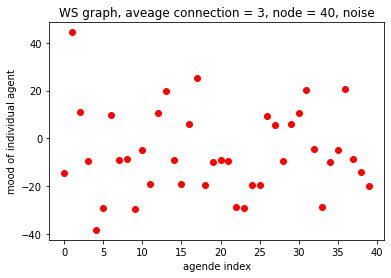

In [27]:
ws1 = ns.make_ws_graph(40, 3, 0.6)
#initialize a network of aganet and store in dictionary
ws_di1 = gm.initialize_network_agent(ws1)
#change payoff
gm.change_all_payoff(ws_di1,0.01,0.005,-0.01)

#change noise index
gm.change_mood_noise(ws_di1, 0.01) #vary (-0.5,  0.5) * 0,01
gm.change_mood_regression(ws_di1, 0.05) #5%regression

#loop
mood_ovt = gm.run_sim(ws1,ws_di1, 500, 1, 0) #play(network, directory,  mvy = 0 - random , mry = 0 -regression

#agent value
mood_value = []    
for i in list(ws_di1.values()):
        mood_value.append(i.mood)
        

#plot       
plt.plot(mood_value,'ro')  
plt.xlabel("agende index")
plt.ylabel("mood of individual agent")
plt.title("WS graph, aveage connection = 3, node = 40, noise")
np.std(mood_value)

# List of things to look at
## simple:
impact of adding randsom enviromental noise
impact of adding mood regression to mean (both linear and non-linar)

## Complex
network connectivity's impact
network 
